<a href="https://colab.research.google.com/github/eliasrahimi/Testing/blob/master/Slutuppgift_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inlämning Data Analytics slutuppgift 1: Utforska, analysera och prediktera på trafikdata

## Bakgrund

Du har fått jobb som data analytiker på ett startup bolag som vill börja sälja en tjänst till smarta städer. Affärsidén går ut på att förenkla polisens arbete genom att förutspå trafikhändelser. 

Som första steg i ditt arbete har du lokaliserat ett dataset med historik om incidenter i trafiken. Med detta dataset avser du testköra ett antal maskininlärningsmodeller för att utöka din kunskap om domänen och hitta lämpliga modeller som företaget kan använda. 

Datasetet finns också på det githubrepositorie som skapats för er för slutuppgift 1.

Det är valfritt om ni vill använda hela eller delar (sample) av detta dataset, **alla val ni gör behöver dock explicit beskrivas och motiveras**. Det kan vara klokt att enbart arbeta med ett sample eftersom detta dataset innehåller flera miljoner rader.

För ytterligare instruktioner, se presentationen av slutuppgift 1&2 som finns på Studium.

## Problembeskrivning

Du ska använda ditt dataset för att identifiera ett antal (minst 2) lämpliga frågor som är möjliga att genomföra på den data du har tillgång till.

De två frågorna ska vara av olika karaktär, exempelvis en prediktiv fråga som är av regressionskaraktär och en annan som är av klassificeringskaraktär, eller en klassificeringsfråga och en assoiationsanalysfråga, eller en regression och en klusterfråga. **Minst en fråga ska vara prediktiv, alltså övervakad inlärning (klassificering/regression)** 

Du ska testa minst 2 modeller för varje fråga, vilket innebär att du behöver testa minst 4 modeller totalt. 

Du vill använda ditt dataset för att identifiera vilken data som behövs för att kunna utveckla tjänsten samt för att utvärdera vilken kvalitet som krävs och hur pre-processing bör genomföras. I ditt arbete vill du också identidiera potentiella problem med dataset och analyser utifrån etiska aspekter. Denna kunskap ska sedan teoretiseras i uppgift 2.

Använd kunskaper du inhämtat tidigare under kursen, det är helt ok att använda kod från exempelvis tidigare laborationer och övningar som finns på kursens GitHub, eller hitta lämpliga algoritmexempel från nätet. 

In [ ]:
#Hur ser allvarlighetsgraden ut i förhållande till andra faktorer?

In [ ]:
#Sker flest olyckor vid trafikljus?

## Rättning

Uppgiften ger totalt 100 poäng, för godkänt behöver du minst 80 poäng. Hur många poäng varje deluppgift ger syns i varje del. 

## Data collection

Ladda in ditt dataset (10 poäng).

In [2]:
# Import numpy, pandas, matpltlib.pyplot, sklearn moduler & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
plt.style.use('ggplot')

# Importerar KNeighborsClassifier för vår k-NN modell
from sklearn.neighbors import KNeighborsClassifier

# Importerar DecisionTreeClassifier för Decision tree modellen
from sklearn.tree import DecisionTreeClassifier

# Importerar RandomForestClassifier för Random forest modell
from sklearn.ensemble import RandomForestClassifier

# Importerar LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
#Vi begränsar till de första 500 000 raderna i csv:n
df = pd.read_csv('US_Accidents_June20.csv', nrows=500000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153650 entries, 0 to 153649
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     153650 non-null  object 
 1   Source                 153650 non-null  object 
 2   TMC                    153650 non-null  float64
 3   Severity               153650 non-null  int64  
 4   Start_Time             153650 non-null  object 
 5   End_Time               153650 non-null  object 
 6   Start_Lat              153650 non-null  float64
 7   Start_Lng              153650 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           153650 non-null  float64
 11  Description            153650 non-null  object 
 12  Number                 39646 non-null   float64
 13  Street                 153650 non-null  object 
 14  Side                   153650 non-nu

In [ ]:
df.shape

(500000, 49)

In [ ]:
df['State'].value_counts()

CA    175172
TX     77490
FL     49481
PA     30960
MI     25110
NY     25067
GA     18639
IL     17119
OH     11511
WA     11408
MD     10298
NJ      8573
NE      8307
MA      8042
VA      7837
CT      4135
SC      4124
IA      2160
MO      1911
RI      1567
DC       591
NH       152
DE       115
WI        69
OR        63
WV        45
IN        44
KY         6
AL         4
Name: State, dtype: int64

In [4]:
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


Vi har valt att importera en större del av datsetet, men för algoritmerna har i uppgiften kommer fokus främst ligger på mindre delar av datasetet t.ex. en delstat. Detta pga av datasetets mängd är svår att hantera och att begränsa datamängden när vi jobbar med modellerna förbättrar även prestandan i colbaratory (förkortar körningstid). Hårdvaran vi befinner oss på drar också nytta av detta.

För modellerna kommer enbart Texasdata tränas då det inte blir lika tugnt för körning.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   TMC                    500000 non-null  float64
 3   Severity               500000 non-null  int64  
 4   Start_Time             500000 non-null  object 
 5   End_Time               500000 non-null  object 
 6   Start_Lat              500000 non-null  float64
 7   Start_Lng              500000 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           500000 non-null  float64
 11  Description            500000 non-null  object 
 12  Number                 176443 non-null  float64
 13  Street                 500000 non-null  object 
 14  Side                   500000 non-nu

In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Data preprocessing

Utvärdera kvaliteten på ert data och genomför nödvändig pre-processing för att adressera dessa kvalitetsbrister. Pre-processingen ska vara relevant för den fråga ni ska ställa, det innebär att ni förmodligen behöver olika pre-processing för era två olika frågor. (30 poäng).

*Hint: Tänk på om du behöver droppa kolumner som inte är relevanta, duplicerad data, saknad data, tänk också på vilken typ av data ni behöver beroende på vilka modeller ni planerar att använda*

In [ ]:
# Nu Extraherar vi år, månad, dag, timme, för att städa upp tiden så att vi lättare kan hantera och tolka den i kommande moment.

In [ ]:
# konverterar  Start_Time och End_Time till pandas datetime, vi sätter error till NaN
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# konverterar år, månad, dag, tid
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extrahera tiden i minutsenheten för varje olycka, och avrundar till närmaste heltal.
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     500000 non-null  object        
 1   Source                 500000 non-null  object        
 2   TMC                    500000 non-null  float64       
 3   Severity               500000 non-null  int64         
 4   Start_Time             500000 non-null  datetime64[ns]
 5   End_Time               500000 non-null  datetime64[ns]
 6   Start_Lat              500000 non-null  float64       
 7   Start_Lng              500000 non-null  float64       
 8   End_Lat                0 non-null       float64       
 9   End_Lng                0 non-null       float64       
 10  Distance(mi)           500000 non-null  float64       
 11  Description            500000 non-null  object        
 12  Number                 176443 non-null  floa

In [ ]:
#Hanterar outliers, visar rader med negativt värde för td
df[td][df[td]<=0]

69719     -0.0
69720     -0.0
69721     -0.0
69722     -1.0
69723     -1.0
309387   -30.0
309388   -30.0
Name: Time_Duration(min), dtype: float64

In [ ]:
#skirver till neg_outliers värden som är lika eller under 0
neg_outliers=df[td]<=0
#sätter outliers till NaN
df[neg_outliers] = np.nan
#raderar rader som innehåller negativvärde
df.dropna(subset=[td],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499993 entries, 0 to 499999
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     499993 non-null  object        
 1   Source                 499993 non-null  object        
 2   TMC                    499993 non-null  float64       
 3   Severity               499993 non-null  float64       
 4   Start_Time             499993 non-null  datetime64[ns]
 5   End_Time               499993 non-null  datetime64[ns]
 6   Start_Lat              499993 non-null  float64       
 7   Start_Lng              499993 non-null  float64       
 8   End_Lat                0 non-null       float64       
 9   End_Lng                0 non-null       float64       
 10  Distance(mi)           499993 non-null  float64       
 11  Description            499993 non-null  object        
 12  Number                 176440 non-null  floa

In [ ]:
# Kontrollera föringet negativt td
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [ ]:
#hanterar outliers i time_duration med hjälp av standardavikelse och median 
n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n
#Identifierar outliers

df[outliers] = np.nan
#ersätter outliers med NaN

df[td].fillna(median, inplace=True)
#ersätter Time_Duration med median
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499993 entries, 0 to 499999
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     499988 non-null  object        
 1   Source                 499988 non-null  object        
 2   TMC                    499988 non-null  float64       
 3   Severity               499988 non-null  float64       
 4   Start_Time             499988 non-null  datetime64[ns]
 5   End_Time               499988 non-null  datetime64[ns]
 6   Start_Lat              499988 non-null  float64       
 7   Start_Lng              499988 non-null  float64       
 8   End_Lat                0 non-null       float64       
 9   End_Lng                0 non-null       float64       
 10  Distance(mi)           499988 non-null  float64       
 11  Description            499988 non-null  object        
 12  Number                 176440 non-null  floa

Pre-processing för Traffic_Signal


In [ ]:
df['Traffic_Signal'].isnull().value_counts()
#NaN-värde

False    499988
True          5
Name: Traffic_Signal, dtype: int64

In [ ]:
#Ersätter NaN med 0
df['Traffic_Signal'].fillna((0), inplace=True)

In [ ]:
#Kontroller NaN-värden
df['Traffic_Signal'].isnull().value_counts()

False    499993
Name: Traffic_Signal, dtype: int64

In [ ]:
#Ska bara finns true- och false-värden
df['Traffic_Signal'].value_counts()

0.0    400810
1.0     99183
Name: Traffic_Signal, dtype: int64

In [ ]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 1488.0 minutes or 25 hours or 1 days; Min to clear an accident td: 10.0 minutes.


In [ ]:
#exporterar städat data
df.to_csv('US_Accidents_June20_clean.csv',index=False)

In [ ]:
# lista över funktioner som ska användas till våra algoritmer
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [ ]:
# datframe med våra utvalda funktioner
df_sel=df[feature_lst].copy()

In [ ]:
#exporterar utvald data
df_sel.to_csv('./US_Accidents_June20_clean_sel.csv',index=False)

In [ ]:
# Kontroller saknade värden för varje kolumn. Om ett värde är NaN blir det värdet representerat av en etta i övriga fall  är värdet 0 och sedan tas medelvärdet på kolumnen
df_sel.isnull().mean()

Source                0.000010
TMC                   0.000010
Severity              0.000010
Start_Lng             0.000010
Start_Lat             0.000010
Distance(mi)          0.000010
Side                  0.000010
City                  0.000054
County                0.000010
State                 0.000010
Timezone              0.000134
Temperature(F)        0.014514
Humidity(%)           0.015844
Pressure(in)          0.011492
Visibility(mi)        0.021092
Wind_Direction        0.008308
Weather_Condition     0.020384
Amenity               0.000010
Bump                  0.000010
Crossing              0.000010
Give_Way              0.000010
Junction              0.000010
No_Exit               0.000010
Railway               0.000010
Roundabout            0.000010
Station               0.000010
Stop                  0.000010
Traffic_Calming       0.000010
Traffic_Signal        0.000000
Turning_Loop          0.000010
Sunrise_Sunset        0.000054
Hour                  0.000010
Weekday 

In [ ]:
# raderar rader med NaN med hjälp av mean()
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(485052, 34)

In [ ]:
df_sel.isnull().mean()

Source                0.0
TMC                   0.0
Severity              0.0
Start_Lng             0.0
Start_Lat             0.0
Distance(mi)          0.0
Side                  0.0
City                  0.0
County                0.0
State                 0.0
Timezone              0.0
Temperature(F)        0.0
Humidity(%)           0.0
Pressure(in)          0.0
Visibility(mi)        0.0
Wind_Direction        0.0
Weather_Condition     0.0
Amenity               0.0
Bump                  0.0
Crossing              0.0
Give_Way              0.0
Junction              0.0
No_Exit               0.0
Railway               0.0
Roundabout            0.0
Station               0.0
Stop                  0.0
Traffic_Calming       0.0
Traffic_Signal        0.0
Turning_Loop          0.0
Sunrise_Sunset        0.0
Hour                  0.0
Weekday               0.0
Time_Duration(min)    0.0
dtype: float64

In [ ]:
# Exporterar dataset med raderade nullvärden.
df_sel.to_csv('./US_Accidents_June20_clean_sel_dropna.csv',index=False)

## Utforska och visualisera data (descriptiv statistics)
Producera statistik från ert dataset. Utforska data genom att använda visualiering, och demonstrera att ni behörskar ett antal olika sätt att visualisera data i grafiskt form. Minst ett histogram och ett spridningsdiagram ska uppvisas i denna del för full poäng. (20 poäng).

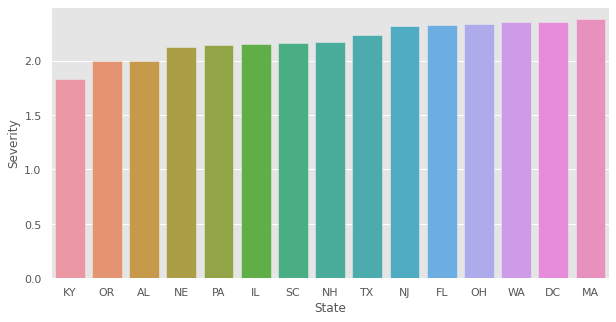

In [ ]:
#Visar olycksgraden i förhållande till 15 delstater
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
plt.figure(figsize=(10,5))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(15))
plt.ioff()

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Day,Hour,Time_Duration(min)
count,499988.000000,499988.000000,499988.000000,499988.000000,0.0,0.0,499988.000000,176440.000000,492736.000000,62359.000000,492071.000000,494247.000000,489447.000000,410949.000000,51944.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499988.000000,499993.000000,499988.0,499988.000000,499988.000000,499988.000000,499993.000000
mean,208.208647,2.374689,35.929448,-97.590579,NaN,NaN,0.065287,5214.750595,64.667681,30.422478,64.529342,30.004806,9.227906,8.913074,0.068998,0.015724,0.000136,0.076346,0.002548,0.060653,0.000942,0.009080,0.000056,0.025457,0.015968,0.000446,0.198369,0.0,2016.437472,15.682762,12.716713,39.925477
std,19.530117,0.486795,5.032490,18.280984,NaN,NaN,0.782867,7650.766240,16.877598,15.796170,21.387982,0.242346,2.140201,5.414958,0.562101,0.124407,0.011661,0.265551,0.050414,0.238694,0.030678,0.094857,0.007483,0.157508,0.125353,0.021114,0.398772,0.0,0.496075,8.720144,5.205430,17.826755
min,200.000000,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,1.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.000000,1.000000,0.000000,10.000000
25%,201.000000,2.000000,32.811329,-118.096634,NaN,NaN,0.000000,725.000000,55.000000,21.900000,49.000000,29.900000,10.000000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.000000,8.000000,9.000000,30.000000
50%,201.000000,2.000000,34.247261,-95.543991,NaN,NaN,0.010000,2435.000000,66.200000,31.000000,66.000000,30.000000,10.000000,8.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2016.000000,16.000000,12.000000,30.000000
75%,201.000000,3.000000,40.134354,-81.565738,NaN,NaN,0.010000,6773.250000,77.000000,38.100000,82.000000,30.110000,10.000000,11.500000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2017.000000,23.000000,17.000000,45.000000
max,406.000000,4.000000,48.199970,-70.571518,NaN,NaN,90.370003,312568.000000,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2017.000000,31.000000,23.000000,1488.000000


In [ ]:
# väljer ut en delstat för att träna våra modeller på och plotta ut en karta över var olyckor i landet sker. Detta för att bättre illustrera vilka zoner som är mest drabbade.
state='TX'

# väljer ut Texas
df_state=df_sel.loc[df_sel.State==state]
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75930 entries, 261007 to 490167
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              75930 non-null  object 
 1   TMC                 75930 non-null  float64
 2   Severity            75930 non-null  float64
 3   Start_Lng           75930 non-null  float64
 4   Start_Lat           75930 non-null  float64
 5   Distance(mi)        75930 non-null  float64
 6   Side                75930 non-null  object 
 7   City                75930 non-null  object 
 8   County              75930 non-null  object 
 9   Timezone            75930 non-null  object 
 10  Temperature(F)      75930 non-null  float64
 11  Humidity(%)         75930 non-null  float64
 12  Pressure(in)        75930 non-null  float64
 13  Visibility(mi)      75930 non-null  float64
 14  Wind_Direction      75930 non-null  object 
 15  Weather_Condition   75930 non-null  object 
 16

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# skapar dummies för kategoriska data
df_state_dummy = pd.get_dummies(df_state,drop_first=True)

# Exporterar data
df_state_dummy.to_csv('US_Accidents_June20_{}_dummy.csv'.format(state),index=False)

df_state_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75930 entries, 261007 to 490167
Columns: 388 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(364)
memory usage: 40.8 MB


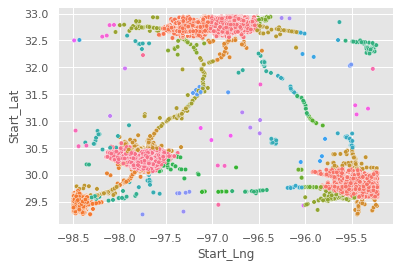

In [ ]:
# Karta över antal olyckor i texas, färgkodar utifrån län.
# Vi ser att det är mest i städerna där flest olyckor sker. Går att jämföra med Texas på karta.
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [ ]:
#funktion för att kunna plota ut flera stapeldiagram 
def create_plots(columns_list, ncols=3):
    nrows= int( (len(columns_list) -1) / ncols)  + 1
    fig, axs = plt.subplots(nrows=nrows , ncols=ncols, figsize= (20,nrows*5))
    plt.subplots_adjust(hspace=0.7)
    plt.subplots_adjust(wspace=0.5)

    sns.set(style="darkgrid")

    for index ,column in enumerate( columns_list ):
        order = df[column].value_counts().iloc[:10].index

        if nrows == 1:
            g = sns.countplot(df[column], alpha=0.9 ,  
                         order= order,
                         ax=axs[ index ])
        else:
            g = sns.countplot(df[column], alpha=0.9 ,  
                         order= order,
                         ax=axs[ int(index / ncols) ][ int(index % ncols) ])
            
        g.set_xticklabels(rotation=60, labels = order )
        g.set_title(column)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

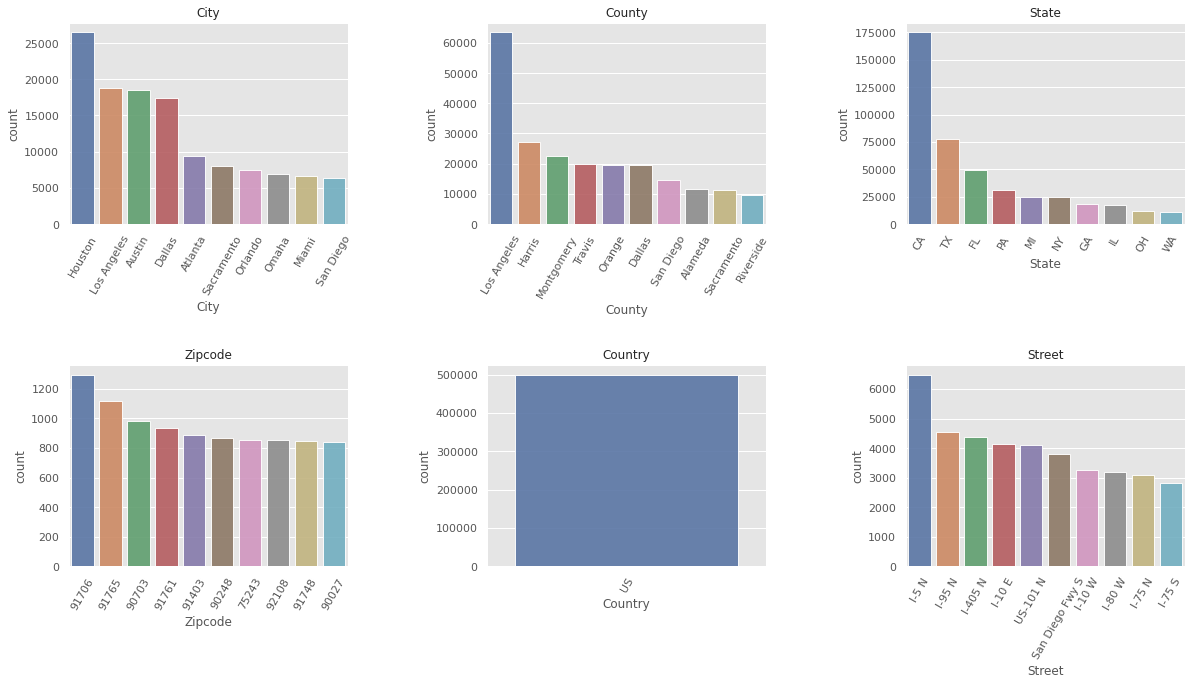

In [ ]:
columns_list = ['City', 'County', 'State' , 'Zipcode' , 'Country' , 'Street']
create_plots(columns_list, ncols=3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

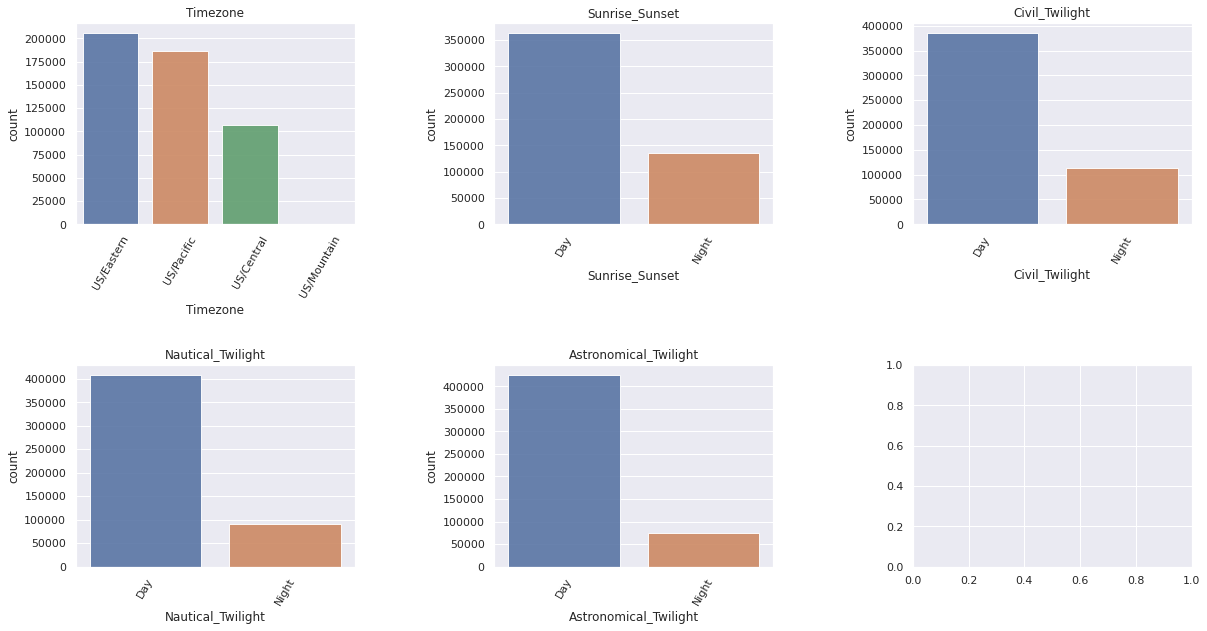

In [ ]:
columns_list = ['Timezone' , 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
create_plots(columns_list,ncols=3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

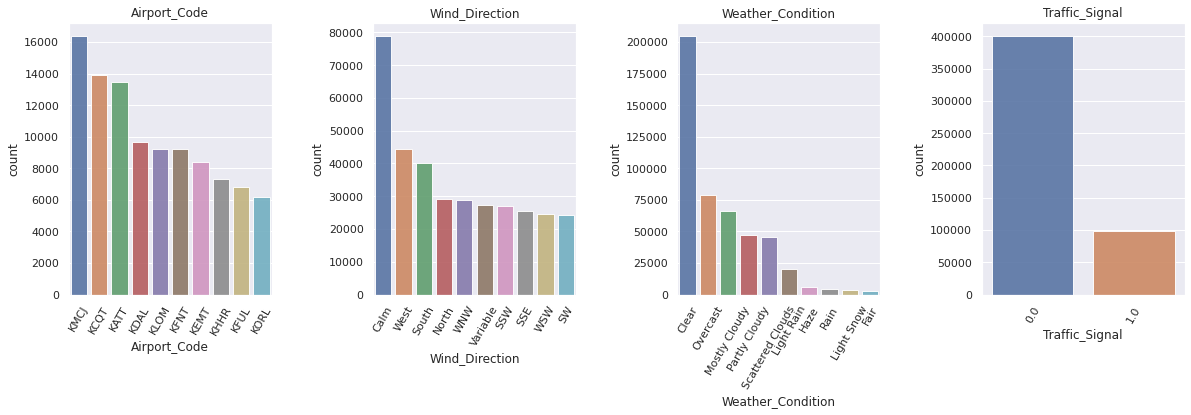

In [ ]:
columns_list = ['Airport_Code', 'Wind_Direction', 'Weather_Condition','Traffic_Signal'] 
create_plots(columns_list,ncols=4)

In [ ]:
#Utifrån grafen ser vi att de flesta olyckor sker inte i samband med trafikljus. 

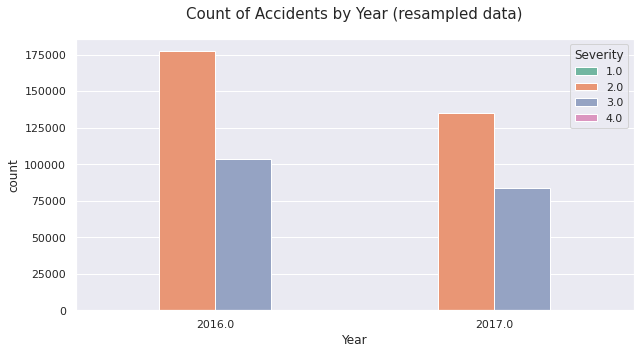

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

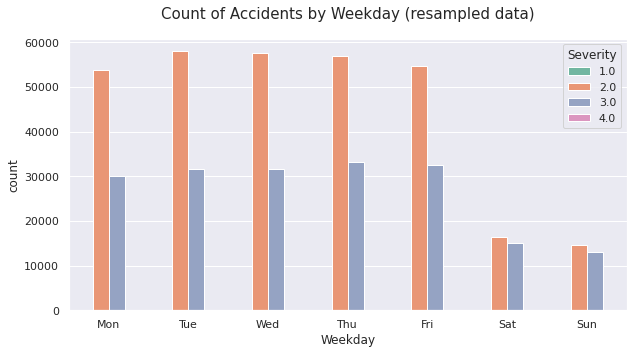

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Weekday (resampled data)', size=15, y=1.05)
plt.show()

In [ ]:
#Sker flest olyckor på vardagar

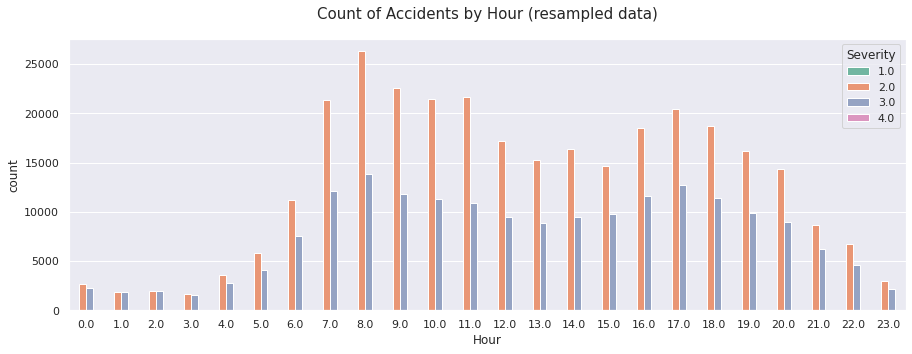

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

In [ ]:
#De flesta olyckor sker i samband med resor till och från jobbet(kl 7-11 och kl 16-18).  

## Modellering

Skapa modeller från ert dataset. Testa och träna. Minst två modeller per fråga, alltså 4 modeller totalt. (20 poäng)

In [ ]:
df_state_dummy.columns

Index(['TMC', 'Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Amenity',
       ...
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Thunderstorm',
       'Weather_Condition_Thunderstorms and Rain', 'Sunrise_Sunset_Night',
       'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thu',
       'Weekday_Tue', 'Weekday_Wed'],
      dtype='object', length=388)

In [ ]:
#algoritmlista som vi använder till när vi plottar ut resultaten. 
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# skapar en listor för våra modellers resultat som beskriver träffsäkerhetn.
accuracy_lst=[]
accuracy_lst_2=[]

In [ ]:
#kod för att träna Traffic_Signal
df=df_state_dummy
# Vi inriktar oss på Traffic_Signal
target='Traffic_Signal'

# arrays för funktionerna och sätter responsvariabeln y

# tilldelar X & y
y = df[target]
X = df.drop(target, axis=1)

# delar in train och test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
#Algorithm A. Logistic regression
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Hämtar vårt resultat
acc=accuracy_score(y_test, y_pred)

# Skirver till lista
accuracy_lst_2.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.732.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Algorithm B. The K-Nearest Neighbors (KNN) algorithm
# skapar K-NN med 6 Neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# anpassar classifiern till vår data
knn.fit(X_train,y_train)

# Predikterar för training data X
y_pred = knn.predict(X_test)

# Hämtar resultat
acc=accuracy_score(y_test, y_pred)

# Skriver till lista
accuracy_lst_2.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.642.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.642.


In [ ]:
#Algorithm C. Decision Tree
# Decision tree algorithm

# instanierar dt_entropy och sätter entropy som kriterium. entropy räknar ut hur abstrakt vår data är. Vid lågt värde är datan mer organiserad.
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# anpssar dt_entropy till träningsdatan
dt_entropy.fit(X_train, y_train)

#  predikterar för testdatan
y_pred= dt_entropy.predict(X_test)

# Utvärderar accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instanierar dt_gini, sätter 'gini' som kriterium. Räknar ut sannolikheten för felval. 
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Anpassar dt_gini till träningsdatan
dt_gini.fit(X_train, y_train)

# dt_gini används till att prediktera
y_pred= dt_gini.predict(X_test)

# Utvärderar accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred)

# skiver till lista
acc=accuracy_gini
accuracy_lst_2.append(acc)

print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.745.
[Decision Tree -- gini] accuracy_score: 0.747.


In [ ]:
#Algorithm D. Random Forest
# Random Forest algorithm

clf_2=RandomForestClassifier(n_estimators=100)
#Tränar modellen
clf_2.fit(X_train,y_train)

y_pred=clf_2.predict(X_test)


# Hämtar resutlat
acc=accuracy_score(y_test, y_pred)

# skiver till lista
accuracy_lst_2.append(acc)

print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.757.


In [ ]:
#kod för att träna Severity
# Vi inriktar oss på 'Severity'
target='Severity'

# arrays för funktionerna och sätter responsvariabeln y

# tilldelar X & y
y = df[target]
X = df.drop(target, axis=1)

# delar in train och test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
#Algorithm A. Logistic regression
# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Hämtar vårt resultat
acc=accuracy_score(y_test, y_pred)

# Skirver till lista
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.811.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Algorithm B. The K-Nearest Neighbors (KNN) algorithm
# skapar K-NN med 6 Neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# anpassar classifiern till vår data
knn.fit(X_train,y_train)

# Predikterar för training data X
y_pred = knn.predict(X_test)

# Hämtar resultat
acc=accuracy_score(y_test, y_pred)

# Skriver till lista
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.801.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.801.


In [ ]:
#Algorithm C. Decision Tree
# Decision tree algorithm

# instanierar dt_entropy och sätter entropy som kriterium
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# anpssar dt_entropy till träningsdatan
dt_entropy.fit(X_train, y_train)

# predikterar för testdatan
y_pred= dt_entropy.predict(X_test)

# Utvärderar accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instanierar dt_gini, sätter 'gini' som kriterium
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Anpassar dt_gini till träningsdatan
dt_gini.fit(X_train, y_train)

# dt_gini används till att prediktera
y_pred= dt_gini.predict(X_test)

# Utvärderar accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred)

# skiver till lista
acc=accuracy_gini
accuracy_lst.append(acc)

print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.840.
[Decision Tree -- gini] accuracy_score: 0.845.


In [ ]:
#Algorithm D. Random Forest
# Random Forest algorithm

#Skapar en classifier för normalfördelning
clf=RandomForestClassifier(n_estimators=100)

#Tränar modellen
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Hämtar resutlat
acc=accuracy_score(y_test, y_pred)

# skiver till lista
accuracy_lst.append(acc)

print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.872.


## Utvärdering

Jämför minst två modeller för varje av dina två frågor och fyra olika modeller totalt. För full poäng ska dessutom flera mått på kvalitet användas. (20 poäng)

No handles with labels found to put in legend.


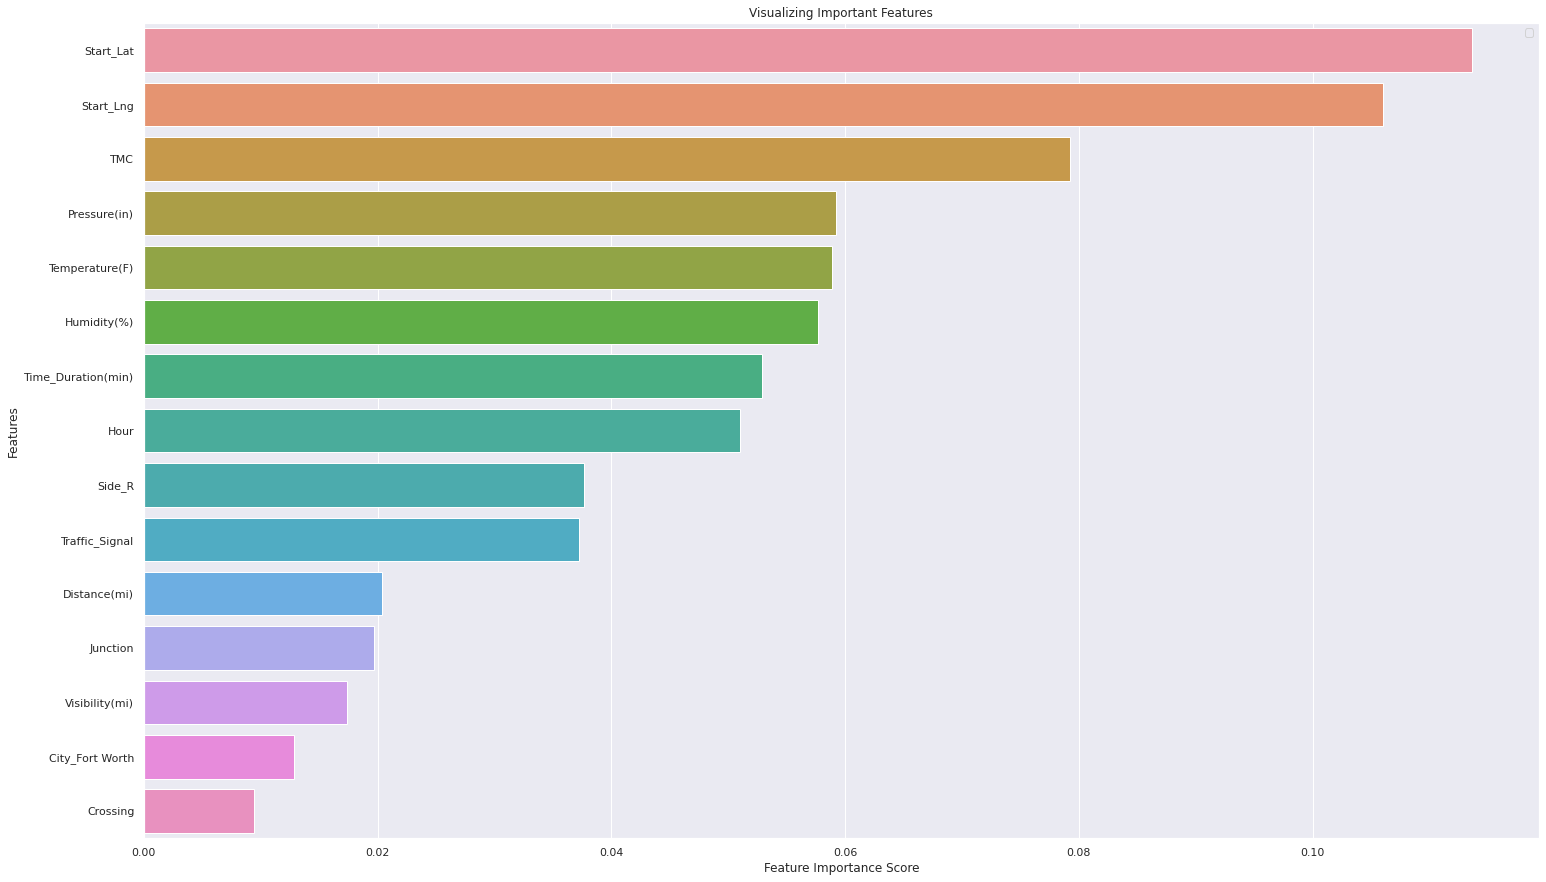

In [ ]:
plt.figure(figsize=(25,15))
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# bar plot för top funktioner
k=15
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:k])
# rubriker
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# listar top funktioner
k=15
feature_imp.sort_values(ascending=False)[:k]

Start_Lat             0.113670
Start_Lng             0.106062
TMC                   0.079240
Pressure(in)          0.059239
Temperature(F)        0.058876
Humidity(%)           0.057654
Time_Duration(min)    0.052870
Hour                  0.051015
Side_R                0.037683
Traffic_Signal        0.037238
Distance(mi)          0.020362
Junction              0.019669
Visibility(mi)        0.017409
City_Fort Worth       0.012842
Crossing              0.009397
dtype: float64

In [ ]:
#väljer top funktioenr, sätter threshold
#Skapar ett selektor-objekt som vi använder som nyttjar random forest classifier för att hitta funktioner med ett värde över 0.02
sfm = SelectFromModel(clf, threshold=0.02)

# tränar vårt objekt
sfm.fit(X_train, y_train)

feat_labels=X.columns

# skriver ut namnen på de viktgiast funktioerna
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Traffic_Signal
Hour
Time_Duration(min)
Side_R


In [ ]:
# Transformer till nytt dataset med viktigaste funktioerna
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Ny random forest klassificerar för de vitkgaste funktioerna
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# tränar klassficeraren på vårt nya dataset
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Tillämpar nya klassificeraren för vår testdata
y_pred = clf.predict(X_test)

# Visar träffsäkerheten för den nya modellen.
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Tillämpar vår fullständiga klassificerare på den nya testdatan 
y_important_pred = clf_important.predict(X_important_test)

# jämför träffsäkerheten
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.872.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.890.


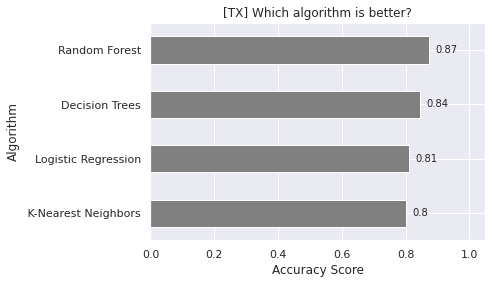

In [ ]:
# plotar träffsäkerheten för algoritmerna på Severity

# Skapar y-axis punkter
y_ticks=np.arange(len(algo_lst))

# skapar en dataframe för våra algortimer och resutlaten samt sorterar efter träffsäkerhetn
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Exporterar data
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Skapar plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Rubriksättning
for i in ax.patches:
    # get_width justerar åt vänster eller höger; get_y justeras upp eller ned
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Sätter lables, ticks, limit och title
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] Which algorithm is better?'.format(state))

plt.show()

In [ ]:
#För Traffic_signals

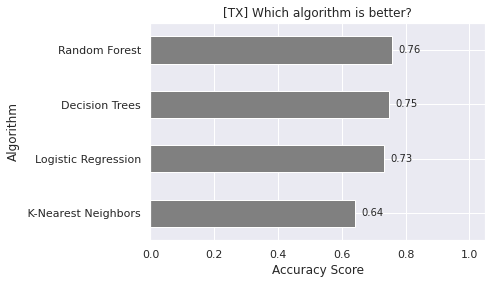

In [ ]:
# plotar träffsäkerheten för algoritmer på Traffic_Signals

# Skapar y-axis punkter
y_ticks=np.arange(len(algo_lst))

# skapar en dataframe för våra algortimer och resutlaten samt sorterar efter träffsäkerhetn
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst_2)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Exporterar data
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Skapar plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Rubriksättning
for i in ax.patches:
    # get_width justerar åt vänster eller höger; get_y justeras upp eller ned
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Sätter lables, ticks, limit och title
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}] Which algorithm is better?'.format(state))

plt.show()

In [ ]:
#Om man enbart utgår utifrån träffsäkerheten är Random Forest den mest överlägsna algoritmen. KNN är både sämre i träffsäkerhetn och tar lång tid i körningen.